DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has consistently paid attention to its customer experience so that it will not be abandoned by customers.

Even though it is only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning.

For the dataset in csv format https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv

 
The details for the data are as follows:

* UpdatedAt Periode of Data taken
* customerID Customer ID
* gender Whether the customer is a male or a female (Male, Female)
* SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
* Partner Whether the customer has a partner or not (Yes, No)
* Dependents Whether the customer has dependents or not (Yes, No)
* tenure Number of months the customer has stayed with the company
* PhoneService Whether the customer has a phone service or not (Yes, No)
* MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges The amount charged to the customer monthly
* TotalCharges The total amount charged to the customer
* Churn Whether the customer churned or not (Yes or No)

## **1. Dataset**

In [1]:
import pandas as pd
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [2]:
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,...,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,...,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [3]:
#Sum of unique ID
print(df_load.customerID.nunique())

7017


## **2. Data Cleansing**

Looking for the correct customerID Customer ID Number (Phone Number) format, with the following criteria:

* Character length is 11-12.
* Consists of numbers only, no characters other than numbers are allowed
* Starting with the number 45 the first 2 digits.

In [4]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('The result of the filtered number of Customer IDs is',df_load['customerID'].count())

The result of the filtered number of Customer IDs is 7006


In [5]:
# Drop Duplicate Rows
df_load.drop_duplicates()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,...,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,...,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [6]:
df_load.duplicated().sum()

7

There are duplicates that may be caused by different periods of data collection. Then the duplicate data is dropped by period.

In [7]:
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('The result of the number of Customer IDs that have been removed from duplication (distinct) is',df_load['customerID'].count())

The result of the number of Customer IDs that have been removed from duplication (distinct) is 6993


The validity of the customer ID Number is very necessary to ensure that the data we take is correct. Based on these results, there are differences in the number of ID numbers from the first data loaded to the final result. The number of rows of data when it is first loaded is 7113 rows and 22 columns with 7017 unique IDs. Then after checking the validity of the customer ID, the remaining 6993 rows of data

Next, see how many missing values are in the Churn column. Because it is assumed that the data modeller only wants to accept data that has churn or not

In [8]:
print('Total missing values data from Churn column',df_load['Churn'].isnull().sum())

Total missing values data from Churn column 43


In [9]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows and Data column after deleting Missing Values data is',df_load.shape)

Total Rows and Data column after deleting Missing Values data is (6950, 22)


It is assumed that the data modeller asks for missing values to fill in with the following criteria:

* The data modeller's tenure request that each row that has missing values for the length of the subscription be filled with 11.
* Variables that are numeric other than Tenure are filled with the median of each of these variables.

In [10]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nThe number of Missing Values for each column is:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

The number of Missing Values for each column is:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [11]:
# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

In [12]:
# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
print('\nThe number of Missing Values after imputering the data is:')
print(df_load.isnull().sum().sort_values(ascending=False))


The number of Missing Values after imputering the data is:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


Missing values are listed in the Churn, tenure, MonthlyCharges & TotalCharges columns. After we handle it by deleting rows and filling rows with certain values, it is proven that there are no more missing values in the data, as evidenced by the number of missing values for each variable which is worth 0.

Then check whether there are outliers or not.

In [13]:
print('\nDistribution of data before being handled by Outliers: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Distribution of data before being handled by Outliers: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


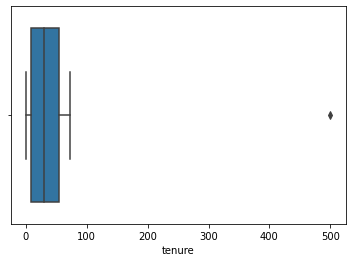

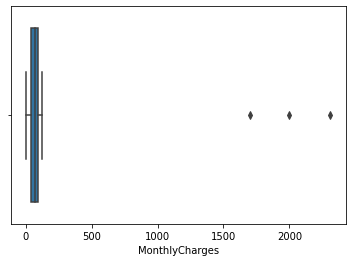

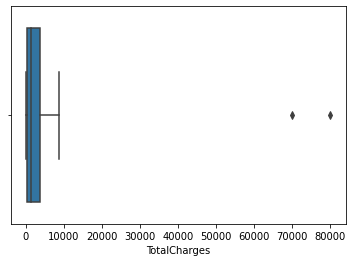

In [14]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

Handling Outlier

In [15]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)

In [16]:
maximum  = Q3 + (1.5*IQR)
print('Maximum value from each variable is: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nMinimum value from each variable is: ')
print(minimum)

Maximum value from each variable is: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Minimum value from each variable is: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [17]:
more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [18]:
print('\nDistribution of data after being handled by Outliers: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Distribution of data after being handled by Outliers: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


From the three boxplots with variables 'tenure', 'MonthlyCharges' & 'TotalCharges' it is clear that there are outliers. This can be identified from the points that are far from the boxplot image. Then if we look at the distribution of the data from the max column, there is also a very high value.

Then the outlier value is handled by changing its value to the maximum & minimum value of the interquartile range (IQR). After handling the outliers, and looking at the distribution of the data, it appears that there are no more outlier values.

After that, detect whether there are values of non-standard categorical variables. This usually occurs due to data input errors. Differences in terms are one of the factors that often occur, for that we need standardization of the data that has been inputted.

In [19]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

There are several non-standard variables. Those variables are:

* Gender (Female, Male, Wanita, Laki-Laki), which can be standardized to(Female, Male).
* Dependents (Yes, No, Iya), which can be standardized to (Yes, No).
* Churn (Yes, No, Churn), which can be standardized to (Yes, No).

In [20]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

In [21]:
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


## **3. Exploratory Data Analysis (EDA)**

The percentage of Churn data distribution and whether or not from all data

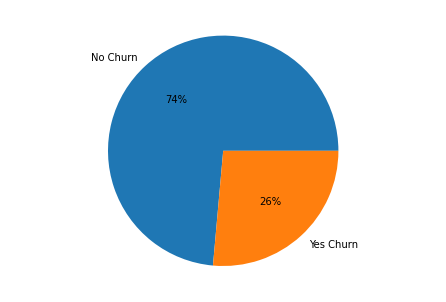

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No Churn','Yes Churn']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

From the pie chart, it can be seen that 74% of total customers who did not churn and 26% churn

The next step is to choose a predictor variable that is numeric and make a bivariate plot, then interpret it

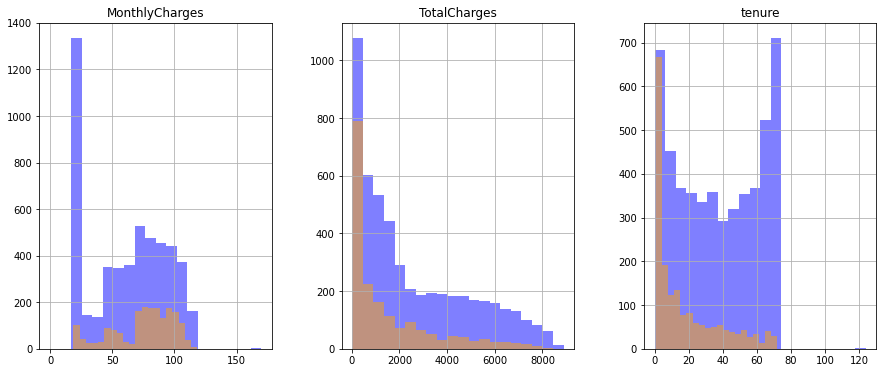

In [23]:
#creating bin in chart
numerical_features =  ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

From the graph above, it can be seen that:
* From the MonthlyCharges graph, it can be seen that the smaller the monthly bill, the smaller the customer churn tends to be.
* For TotalCharges, there seems to be no trend towards customer churn.
* For the tenure graph, it can be seen that the longer the customer subscribes, the less likely the customer to churn.

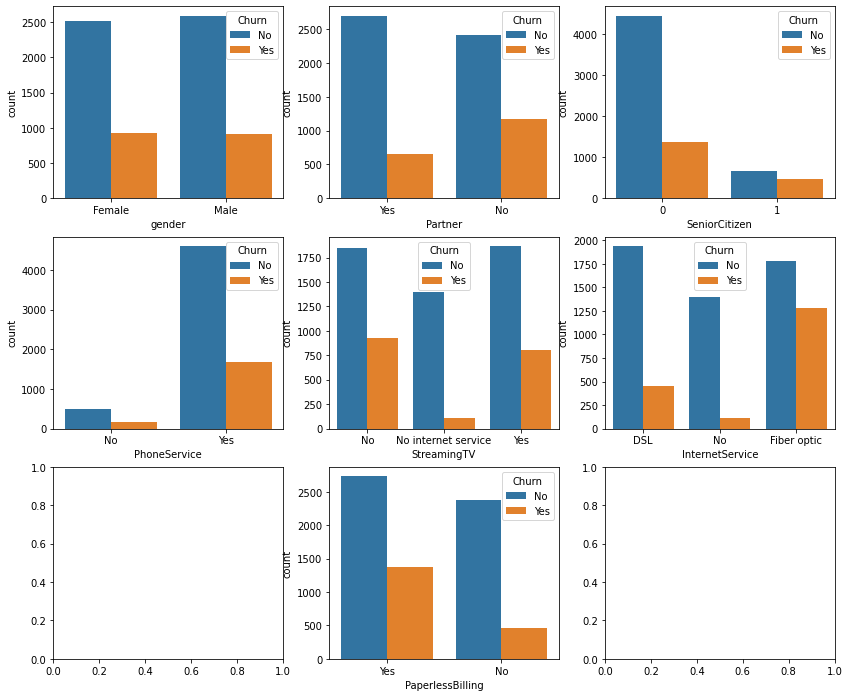

In [24]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout
plt.show()

From the graph above it can be seen that:
* There is no significant difference for people who churn in terms of gender and phone service (PhoneService)
* There is a tendency that people who churn are people who do not have partners, people who are senior citizens, people who have streaming TV, people who have internet services and people whose bills are paperless

## **4. Preprocessing Data**

Remove the columns that are not needed for modeling, namely customerID and UpdatedAt.

In [25]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


Convert data that is still a string to numeric with encoder label

In [26]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  6950.000000    6950.000000  6950.000000  6950.000000  6950.000000   
mean      0.504317       0.162302     0.483309     0.299281    32.423165   
std       0.500017       0.368754     0.499757     0.457976    24.581073   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000   124.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   6950.000000    6950.000000      6950.000000     6950.000000   
mean       0.903741       0.940863         0.872950        0.789496   
std        0.294967       0.948880         0.737618        0.859795   
min        0.000000       0.000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


After that, splitting the dataset to 70:30

In [27]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']

from sklearn.model_selection import train_test_split
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape,', while the Number of rows and columns of y_train is:', y_train.shape)
print('Churn percentage in Training data is:')
print(y_train.value_counts(normalize=True))

print('The number of rows and columns of x_test is:', x_test.shape,', while the number of rows and columns of y_test is:', y_test.shape)
print('Churn percentage in Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (4865, 19) , while the Number of rows and columns of y_train is: (4865,)
Churn percentage in Training data is:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
The number of rows and columns of x_test is: (2085, 19) , while the number of rows and columns of y_test is: (2085,)
Churn percentage in Testing data is:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


## **4. Modelling : LogisticRegression**

In [29]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) : \n',
classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      3575
           1       0.64      0.57      0.60      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.73      0.73      4865
weighted avg       0.79      0.80      0.80      4865



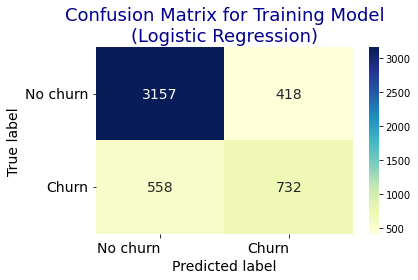

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) : \n',
classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.66      0.54      0.60       546

    accuracy                           0.81      2085
   macro avg       0.75      0.72      0.74      2085
weighted avg       0.80      0.81      0.80      2085



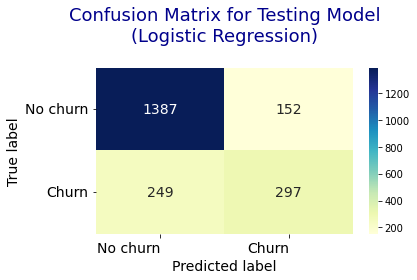

In [33]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## **5. Modelling : RandomForestClassifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier()
rdf_model.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) : \n',
classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      1.00      1.00      4865
weighted avg       1.00      1.00      1.00      4865



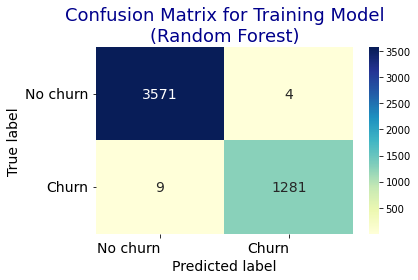

In [36]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [37]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.65      0.47      0.54       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



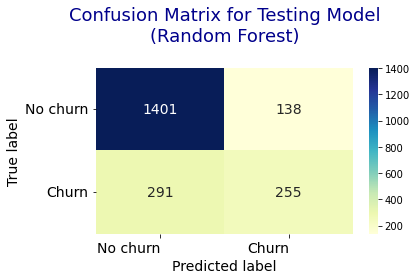

In [38]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 100%, but from the testing data it can be seen that the model is able to predict the data by producing an accuracy of 78%.

## **6. Modelling : Gradien Boosting Classifier**

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [40]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3575
           1       0.73      0.58      0.64      1290

    accuracy                           0.83      4865
   macro avg       0.79      0.75      0.77      4865
weighted avg       0.82      0.83      0.82      4865



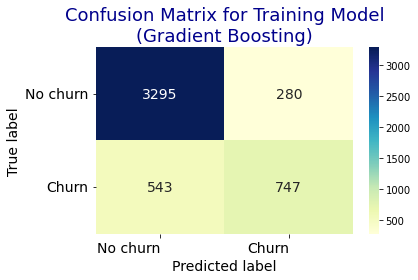

In [41]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [42]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.68      0.51      0.59       546

    accuracy                           0.81      2085
   macro avg       0.76      0.71      0.73      2085
weighted avg       0.80      0.81      0.80      2085



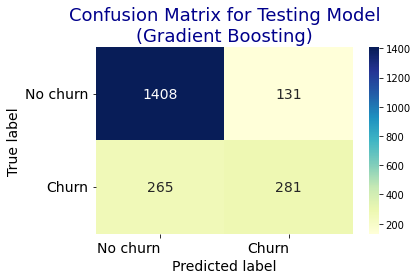

In [43]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 82%, while the testing data shows that the model is able to predict the data by producing an accuracy of 79%.

## **7. Conclusion**

Based on the modeling that has been done using Logistic Regression, Random Forest and Extreme Gradiant Boost, it can be concluded that to predict churn from telco customers using this dataset the best model is to use the Logistic Regression algorithm. This is because the performance of the Logistic Regression model tends to be able to predict equally well in the training and testing phases (80% training accuracy, 79% testing accuracy), on the other hand other algorithms tend to over-fitting their performance.